In [1]:
import mysql.connector
from mysql.connector import connect
from getpass import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from mysql.connector import Error
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
db = connect(
        host= "localhost",
        user = "root",
        passwd = getpass("Enter password: "),
        database= "sakila"
   )

Enter password: ········


# 2.Read the data into a Pandas dataframe.

In [3]:
cursor = db.cursor()

In [4]:
query ="select f.film_id, f.rating,f.replacement_cost,f.rental_duration,f.release_year,convert(r.rental_date,date),r.inventory_id from film f join inventory i using(film_id) join rental r using(inventory_id)"
cursor.execute(query)

In [5]:
records=cursor.fetchall()

In [6]:
df = pd.DataFrame(records)
df

,0,1,2,3,4,5,6
0,1,PG,20.99,6,2006,2005-07-08,1
1,1,PG,20.99,6,2006,2005-08-02,1
2,1,PG,20.99,6,2006,2005-08-21,1
3,1,PG,20.99,6,2006,2005-05-30,2
4,1,PG,20.99,6,2006,2005-06-17,2
...,...,...,...,...,...,...,...
16039,1000,NC-17,18.99,3,2006,2005-05-29,4581
16040,1000,NC-17,18.99,3,2006,2005-06-15,4581
16041,1000,NC-17,18.99,3,2006,2005-07-12,4581
16042,1000,NC-17,18.99,3,2006,2005-07-31,4581


# 3.Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

In [7]:
df.columns

RangeIndex(start=0, stop=7, step=1)

In [8]:
col_names=["film_id","rental_duration","rating","replacement_cost","rental_duration","date","inventory_id"]
df.columns=col_names
df.columns

Index(['film_id', 'rental_duration', 'rating', 'replacement_cost',
       'rental_duration', 'date', 'inventory_id'],
      dtype='object')

In [9]:
df.describe()

,film_id,replacement_cost,rental_duration,inventory_id
count,16044.000000,16044.00000,16044.0,16044.000000
mean,501.108888,4.93549,2006.0,2291.842558
std,288.513529,1.40169,0.0,1322.210643
min,1.000000,3.00000,2006.0,1.000000
25%,255.000000,4.00000,2006.0,1154.000000
50%,496.000000,5.00000,2006.0,2291.000000
75%,753.000000,6.00000,2006.0,3433.000000
max,1000.000000,7.00000,2006.0,4581.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   film_id           16044 non-null  int64 
 1   rental_duration   16044 non-null  object
 2   rating            16044 non-null  object
 3   replacement_cost  16044 non-null  int64 
 4   rental_duration   16044 non-null  int64 
 5   date              16044 non-null  object
 6   inventory_id      16044 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 877.5+ KB


In [11]:
numerical =df.select_dtypes(include=np.number)
categorical = df.select_dtypes(include=np.object)

In [12]:
#Encoding date
date = categorical['date'].value_counts()/len(categorical)
new_date = categorical['date'].map(date)
new_date_df = pd.DataFrame(new_date)

#Encoding rating
rating = categorical['rating'].value_counts()/len(categorical)
new_rating = categorical['rating'].map(rating)
new_rating_df = pd.DataFrame(new_rating)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   film_id           16044 non-null  int64 
 1   rental_duration   16044 non-null  object
 2   rating            16044 non-null  object
 3   replacement_cost  16044 non-null  int64 
 4   rental_duration   16044 non-null  int64 
 5   date              16044 non-null  object
 6   inventory_id      16044 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 877.5+ KB


In [14]:
correlation = df.corr()
correlation

,film_id,replacement_cost,rental_duration,inventory_id
film_id,1.000000,-0.054691,NaN,0.999959
replacement_cost,-0.054691,1.000000,NaN,-0.055091
rental_duration,NaN,NaN,NaN,NaN
inventory_id,0.999959,-0.055091,NaN,1.000000


In [15]:
# data split
X= df.drop("rental_duration", axis=1)

<AxesSubplot:>

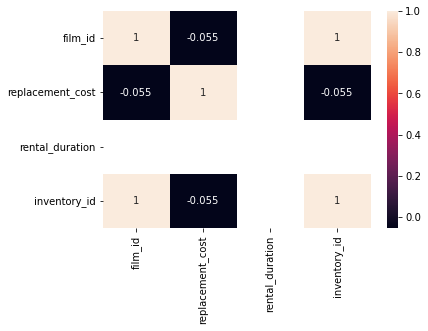

In [16]:
# multicolinearity
correlations_matrix= df.corr()
sns.heatmap(correlations_matrix, annot=True)

# 4.Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.


In [17]:
#Creating the query

query1 = 'select f.film_id, f.title, cast(rental_date as date) from film f left join inventory i using(film_id) left join rental r using(inventory_id)'
cursor.execute(query1)
records1 = cursor.fetchall()

for record in records1:
    print(record)

(1, 'ACADEMY DINOSAUR', datetime.date(2005, 7, 8))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 8, 2))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 8, 21))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 5, 30))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 6, 17))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 7, 7))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 7, 30))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 8, 23))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 7, 31))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 8, 22))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 8, 2))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 8, 21))
(1, 'ACADEMY DINOSAUR', None)
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 5, 27))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 6, 21))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 7, 7))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 7, 27))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 8, 21))
(1, 'ACADEMY DINOSAUR', datetime.date(2005, 6, 15))
(1, 'ACADEMY DINOSAUR', datetime.date(2

(177, 'CONNECTICUT TRAMP', datetime.date(2005, 7, 31))
(177, 'CONNECTICUT TRAMP', datetime.date(2005, 8, 22))
(178, 'CONNECTION MICROCOSMOS', datetime.date(2005, 7, 28))
(178, 'CONNECTION MICROCOSMOS', datetime.date(2006, 2, 14))
(178, 'CONNECTION MICROCOSMOS', datetime.date(2005, 5, 30))
(178, 'CONNECTION MICROCOSMOS', datetime.date(2005, 6, 20))
(178, 'CONNECTION MICROCOSMOS', datetime.date(2005, 7, 7))
(178, 'CONNECTION MICROCOSMOS', datetime.date(2005, 7, 31))
(178, 'CONNECTION MICROCOSMOS', datetime.date(2005, 8, 20))
(179, 'CONQUERER NUTS', datetime.date(2005, 5, 29))
(179, 'CONQUERER NUTS', datetime.date(2005, 6, 16))
(179, 'CONQUERER NUTS', datetime.date(2005, 7, 8))
(179, 'CONQUERER NUTS', datetime.date(2005, 7, 31))
(179, 'CONQUERER NUTS', datetime.date(2005, 8, 20))
(179, 'CONQUERER NUTS', datetime.date(2005, 7, 28))
(179, 'CONQUERER NUTS', datetime.date(2005, 8, 20))
(179, 'CONQUERER NUTS', datetime.date(2005, 5, 28))
(179, 'CONQUERER NUTS', datetime.date(2005, 6, 15))
(179

(334, 'FREDDY STORM', datetime.date(2005, 8, 23))
(334, 'FREDDY STORM', datetime.date(2005, 7, 10))
(334, 'FREDDY STORM', datetime.date(2005, 7, 30))
(334, 'FREDDY STORM', datetime.date(2005, 8, 17))
(334, 'FREDDY STORM', datetime.date(2005, 5, 27))
(334, 'FREDDY STORM', datetime.date(2005, 6, 21))
(334, 'FREDDY STORM', datetime.date(2005, 7, 12))
(334, 'FREDDY STORM', datetime.date(2005, 7, 30))
(334, 'FREDDY STORM', datetime.date(2005, 8, 16))
(334, 'FREDDY STORM', datetime.date(2005, 7, 11))
(334, 'FREDDY STORM', datetime.date(2005, 7, 29))
(334, 'FREDDY STORM', datetime.date(2005, 8, 22))
(334, 'FREDDY STORM', datetime.date(2005, 6, 20))
(334, 'FREDDY STORM', datetime.date(2005, 7, 6))
(334, 'FREDDY STORM', datetime.date(2005, 8, 1))
(334, 'FREDDY STORM', datetime.date(2005, 8, 19))
(335, 'FREEDOM CLEOPATRA', datetime.date(2005, 7, 31))
(335, 'FREEDOM CLEOPATRA', datetime.date(2005, 8, 21))
(335, 'FREEDOM CLEOPATRA', datetime.date(2005, 7, 8))
(335, 'FREEDOM CLEOPATRA', datetime.da

(486, 'JET NEIGHBORS', datetime.date(2005, 7, 12))
(486, 'JET NEIGHBORS', datetime.date(2005, 7, 31))
(486, 'JET NEIGHBORS', datetime.date(2005, 8, 23))
(486, 'JET NEIGHBORS', datetime.date(2005, 6, 21))
(486, 'JET NEIGHBORS', datetime.date(2005, 7, 12))
(486, 'JET NEIGHBORS', datetime.date(2005, 7, 30))
(486, 'JET NEIGHBORS', datetime.date(2005, 8, 20))
(486, 'JET NEIGHBORS', datetime.date(2005, 6, 20))
(486, 'JET NEIGHBORS', datetime.date(2005, 7, 12))
(486, 'JET NEIGHBORS', datetime.date(2005, 7, 30))
(486, 'JET NEIGHBORS', datetime.date(2005, 8, 18))
(486, 'JET NEIGHBORS', datetime.date(2005, 7, 6))
(486, 'JET NEIGHBORS', datetime.date(2005, 7, 29))
(486, 'JET NEIGHBORS', datetime.date(2005, 8, 21))
(486, 'JET NEIGHBORS', datetime.date(2005, 7, 27))
(486, 'JET NEIGHBORS', datetime.date(2005, 8, 22))
(487, 'JINGLE SAGEBRUSH', datetime.date(2005, 6, 21))
(487, 'JINGLE SAGEBRUSH', datetime.date(2005, 7, 12))
(487, 'JINGLE SAGEBRUSH', datetime.date(2005, 7, 29))
(487, 'JINGLE SAGEBRUSH

(646, 'OUTBREAK DIVINE', datetime.date(2005, 6, 21))
(646, 'OUTBREAK DIVINE', datetime.date(2005, 7, 7))
(646, 'OUTBREAK DIVINE', datetime.date(2005, 7, 31))
(646, 'OUTBREAK DIVINE', datetime.date(2005, 8, 23))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 8, 1))
(647, 'OUTFIELD MASSACRE', datetime.date(2006, 2, 14))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 7, 28))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 8, 23))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 7, 8))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 7, 30))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 8, 22))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 6, 17))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 7, 7))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 7, 29))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 8, 21))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 6, 18))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 7, 8))
(647, 'OUTFIELD MASSACRE', datetime.date(2005, 7, 31))
(647, 'OUTFIELD MASSACR

(800, 'SINNERS ATLANTIS', datetime.date(2005, 5, 29))
(800, 'SINNERS ATLANTIS', datetime.date(2005, 6, 18))
(800, 'SINNERS ATLANTIS', datetime.date(2005, 7, 12))
(800, 'SINNERS ATLANTIS', datetime.date(2005, 7, 28))
(800, 'SINNERS ATLANTIS', datetime.date(2005, 8, 22))
(800, 'SINNERS ATLANTIS', datetime.date(2005, 6, 15))
(800, 'SINNERS ATLANTIS', datetime.date(2005, 7, 11))
(800, 'SINNERS ATLANTIS', datetime.date(2005, 8, 1))
(800, 'SINNERS ATLANTIS', datetime.date(2005, 8, 19))
(801, 'SISTER FREDDY', None)
(802, 'SKY MIRACLE', None)
(803, 'SLACKER LIAISONS', datetime.date(2005, 7, 11))
(803, 'SLACKER LIAISONS', datetime.date(2005, 7, 27))
(803, 'SLACKER LIAISONS', datetime.date(2005, 8, 20))
(803, 'SLACKER LIAISONS', datetime.date(2005, 7, 29))
(803, 'SLACKER LIAISONS', datetime.date(2005, 8, 23))
(803, 'SLACKER LIAISONS', datetime.date(2005, 7, 8))
(803, 'SLACKER LIAISONS', datetime.date(2005, 7, 30))
(803, 'SLACKER LIAISONS', datetime.date(2005, 8, 21))
(803, 'SLACKER LIAISONS', da

(958, 'WARDROBE PHANTOM', datetime.date(2005, 7, 28))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 8, 19))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 6, 17))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 7, 9))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 8, 1))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 8, 19))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 5, 30))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 6, 18))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 7, 6))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 7, 30))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 8, 23))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 5, 30))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 6, 18))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 7, 9))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 7, 29))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 8, 23))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 5, 30))
(958, 'WARDROBE PHANTOM', datetime.date(2005, 6, 20))
(958, 'WARDROBE PHANTOM', dateti

In [47]:
#all the films rented

data = pd.DataFrame(records1)
display(data)

,0,1,2
0,1,ACADEMY DINOSAUR,2005-07-08
1,1,ACADEMY DINOSAUR,2005-08-02
2,1,ACADEMY DINOSAUR,2005-08-21
3,1,ACADEMY DINOSAUR,2005-05-30
4,1,ACADEMY DINOSAUR,2005-06-17
...,...,...,...
16082,1000,ZORRO ARK,2005-05-29
16083,1000,ZORRO ARK,2005-06-15
16084,1000,ZORRO ARK,2005-07-12
16085,1000,ZORRO ARK,2005-07-31


In [48]:
#changing the name of the columns
data.columns = ['film_id', 'title', 'rental_date']

In [49]:
#removing nan values if there are..
data = data.dropna(axis=0)
data.isna().sum()

film_id        0
title          0
rental_date    0
dtype: int64

In [50]:
#check the data.
y = data
y

,film_id,title,rental_date
0,1,ACADEMY DINOSAUR,2005-07-08
1,1,ACADEMY DINOSAUR,2005-08-02
2,1,ACADEMY DINOSAUR,2005-08-21
3,1,ACADEMY DINOSAUR,2005-05-30
4,1,ACADEMY DINOSAUR,2005-06-17
...,...,...,...
16082,1000,ZORRO ARK,2005-05-29
16083,1000,ZORRO ARK,2005-06-15
16084,1000,ZORRO ARK,2005-07-12
16085,1000,ZORRO ARK,2005-07-31


# 5 Create a logistic regression model to predict this variable from the cleaned data.


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [29]:
print("Nb of rows of X_train = {}".format(len(X_train)))
print("Nb of rows of X_test = {}".format(len(X_test)))
print("Nb of rows of y_train = {}".format(len(y_train)))
print("Nb of rows of y_test = {}".format(len(y_test)))

Nb of rows of X_train = 11230
Nb of rows of X_test = 4814
Nb of rows of y_train = 11230
Nb of rows of y_test = 4814


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = PolynomialFeatures(degree=2, interaction_only=True) 

In [31]:
#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
preprocessor = StandardScaler()

def model_inplace(scaler, model, X_train, X_test, y_train, y_test):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train,y_train)
    print("R2 score on train set:", round(model.score(X_train, y_train),2))
    print("R2 score on test set:", round(model.score(X_test, y_test),2))
    #print("MSE:", round(mean_squared_error(y, y_pred, squared=True),2))
    #print("RMSE:", round(mean_squared_error(y, y_pred, squared=False),2))
    #print("MAE:", round(mean_absolute_error(y, y_pred),2))

In [32]:
X_train

,film_id,rating,replacement_cost,date,inventory_id
2646,165,27.99,7,2005-07-08,755
14142,880,9.99,6,2005-06-18,4042
11790,738,27.99,3,2005-08-23,3365
4611,292,20.99,3,2005-07-08,1321
11475,721,23.99,7,2005-08-23,3273
...,...,...,...,...,...
905,57,18.99,4,2005-06-18,258
5192,324,11.99,3,2005-07-08,1484
12172,761,23.99,7,2005-07-12,3473
235,15,10.99,5,2005-07-06,73


In [33]:
reg = LinearRegression()
ridge = Ridge(alpha=0.3)
lasso = Lasso (alpha=0.1) 

# 6 Evaluate the results.


In [ ]:
print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))

In [ ]:
print(classification_report(y_train,pred_train))
print(classification_report(y_test, pred_test))

In [ ]:
# Train set
pred_train = classifier.predict(X_train)
#Test set
pred_test = classifier.predict(X_test)